# Web Scrapping

In [1]:
from selenium import webdriver
import pandas as pd

In [2]:
driver= webdriver.Chrome()

In [3]:
driver.get("http://books.toscrape.com/")

### Get book price

In [4]:
book_price= driver.find_elements("xpath", '//p[@class= "price_color"]')

In [5]:
len(book_price)

20

In [6]:
for price in book_price:
    print(price.text)

£51.77
£53.74
£50.10
£47.82
£54.23
£22.65
£33.34
£17.93
£22.60
£52.15
£13.99
£20.66
£17.46
£52.29
£35.02
£57.25
£23.88
£37.59
£51.33
£45.17


In [7]:
prices= []
for price in book_price:
    prices.append(price.text)
prices

['£51.77',
 '£53.74',
 '£50.10',
 '£47.82',
 '£54.23',
 '£22.65',
 '£33.34',
 '£17.93',
 '£22.60',
 '£52.15',
 '£13.99',
 '£20.66',
 '£17.46',
 '£52.29',
 '£35.02',
 '£57.25',
 '£23.88',
 '£37.59',
 '£51.33',
 '£45.17']

### Getting book titles

In [8]:
book_name= driver.find_elements("xpath", '//h3')

In [9]:
len(book_name)

20

In [10]:
for name in book_name:
    print(name.text)
# Got ...

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


In [11]:
from selenium.webdriver.common.by import By

In [12]:
for name in book_name:
    full_title = name.find_element(By.TAG_NAME, "a").get_attribute("title")
    print(full_title)

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [13]:
titles = []
for name in book_name:
    full_title = name.find_element(By.TAG_NAME, "a").get_attribute("title")
    titles.append(full_title)
titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

### Creating DataFrame

In [14]:
df = pd.DataFrame({
    'Title': titles,
    'Price': prices
})
df

,Title,Price
0,A Light in the Attic,£51.77
1,Tipping the Velvet,£53.74
2,Soumission,£50.10
3,Sharp Objects,£47.82
4,Sapiens: A Brief History of Humankind,£54.23
5,The Requiem Red,£22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60
9,The Black Maria,£52.15


# Preprocessing

In [15]:
df['Price']= df['Price'].str[1:]
df['Price']

0     51.77
1     53.74
2     50.10
3     47.82
4     54.23
5     22.65
6     33.34
7     17.93
8     22.60
9     52.15
10    13.99
11    20.66
12    17.46
13    52.29
14    35.02
15    57.25
16    23.88
17    37.59
18    51.33
19    45.17
Name: Price, dtype: object

In [16]:
df['Price']= df['Price'].astype(float)
df['Price']

0     51.77
1     53.74
2     50.10
3     47.82
4     54.23
5     22.65
6     33.34
7     17.93
8     22.60
9     52.15
10    13.99
11    20.66
12    17.46
13    52.29
14    35.02
15    57.25
16    23.88
17    37.59
18    51.33
19    45.17
Name: Price, dtype: float64

In [17]:
df

,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets of Getting Your Dream...,33.34
7,The Coming Woman: A Novel Based on the Life of...,17.93
8,The Boys in the Boat: Nine Americans and Their...,22.60
9,The Black Maria,52.15


# Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

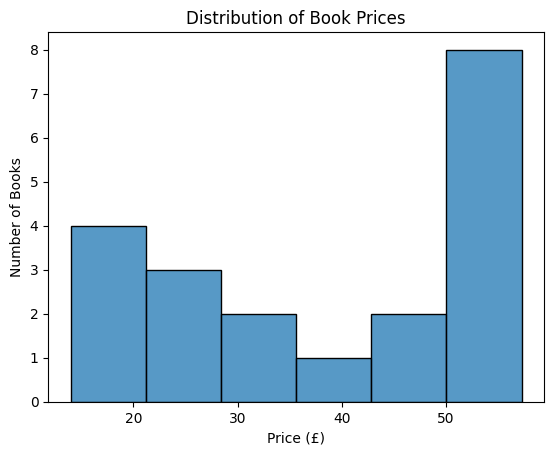

In [19]:
sns.histplot(df['Price'])

plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')

plt.savefig("Distribution of Book Prices.png", dpi=300)
plt.show()

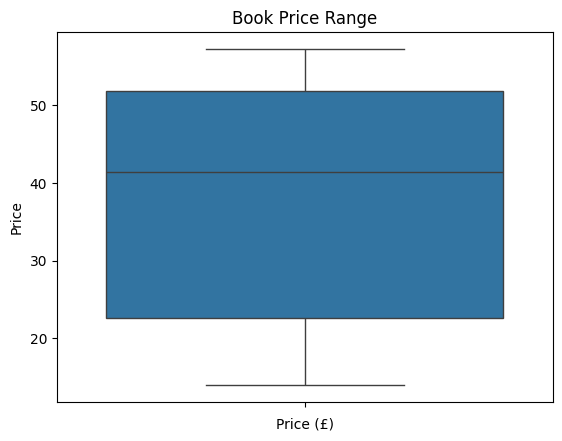

In [20]:
sns.boxplot(df['Price'])
plt.title('Book Price Range')
plt.xlabel('Price (£)')

plt.savefig("Book Price Range.png", dpi=300)
plt.show()

In [21]:
top_5 = df.sort_values(by= 'Price', ascending= False).head(5)
top_5

,Title,Price
15,Our Band Could Be Your Life: Scenes from the A...,57.25
4,Sapiens: A Brief History of Humankind,54.23
1,Tipping the Velvet,53.74
13,Scott Pilgrim's Precious Little Life (Scott Pi...,52.29
9,The Black Maria,52.15


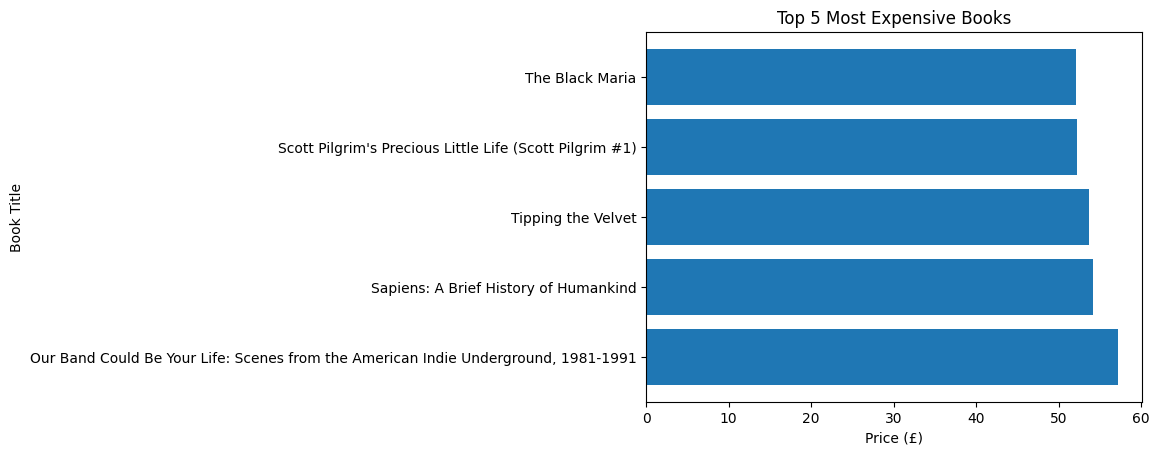

In [22]:
plt.barh(top_5['Title'], top_5['Price'])

plt.title('Top 5 Most Expensive Books')
plt.xlabel('Price (£)')
plt.ylabel('Book Title')

plt.savefig("Top 5 Most Expensive Books.png", dpi=300)
plt.show()